# **Convolutional Neural Network (CNN)**
## **28. Salma Annissa A. (2141720137) / TI-3F**

### **Praktikum 1 - Klasifikasi 🐱 dan 🐶**
#### **Langkah 1 - Import Library**

Pastikan bahwa dataset sudah berhasil diunduh </br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#### **Langkah 2 - Pra Pengolahan Data**

**Langkah 2.1. Pra Pengolahan Data Training**

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MachineLearning/12_Dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


**Langkah 2.2. Pra Pengolahan Data Testing**

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MachineLearning/12_Dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


#### **Langkah 3 - Pembuatan Model CNN**

**Langkah 3.1.  - Inisiasi Model CNN**

In [5]:
cnn = tf.keras.models.Sequential()

**Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Langkah 3.3 - Pembuatan Layer Pooling 1**

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.5 - Flattening**

In [9]:
cnn.add(tf.keras.layers.Flatten())

**Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Langkah 3.8 - Compile Model CNN**

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### **Langkah 4 - Fit CNN**

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 3283s 13s/step - loss: 0.6814 - accuracy: 0.5630 - val_loss: 0.6573 - val_accuracy: 0.6210
Epoch 2/25
250/250 [==============================] - 37s 147ms/step - loss: 0.6358 - accuracy: 0.6410 - val_loss: 0.6022 - val_accuracy: 0.6950
Epoch 3/25
250/250 [==============================] - 36s 145ms/step - loss: 0.5895 - accuracy: 0.6890 - val_loss: 0.5744 - val_accuracy: 0.6985
Epoch 4/25
250/250 [==============================] - 37s 147ms/step - loss: 0.5596 - accuracy: 0.7091 - val_loss: 0.6046 - val_accuracy: 0.6705
Epoch 5/25
250/250 [==============================] - 36s 146ms/step - loss: 0.5203 - accuracy: 0.7415 - val_loss: 0.5028 - val_accuracy: 0.7555
Epoch 6/25
250/250 [==============================] - 37s 147ms/step - loss: 0.5033 - accuracy: 0.7576 - val_loss: 0.4905 - val_accuracy: 0.7610
Epoch 7/25
250/250 [==============================] - 37s 148ms/step - loss: 0.4856 - accuracy: 0.7688 - val_loss: 0.4809 - val_ac

#### **Langkah 5 - Prediksi dengan 1 Citra**

In [15]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/MachineLearning/12_Dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 140ms/step


### **Praktikum 2 - Klasifikasi Multi-label dengan Data CIFAT**
#### **Langkah 1 - Load Library**

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### **Langkah 2 - Unduh Dataset CIFAR**

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


#### **Langkah 3 - Verifikasi Data**

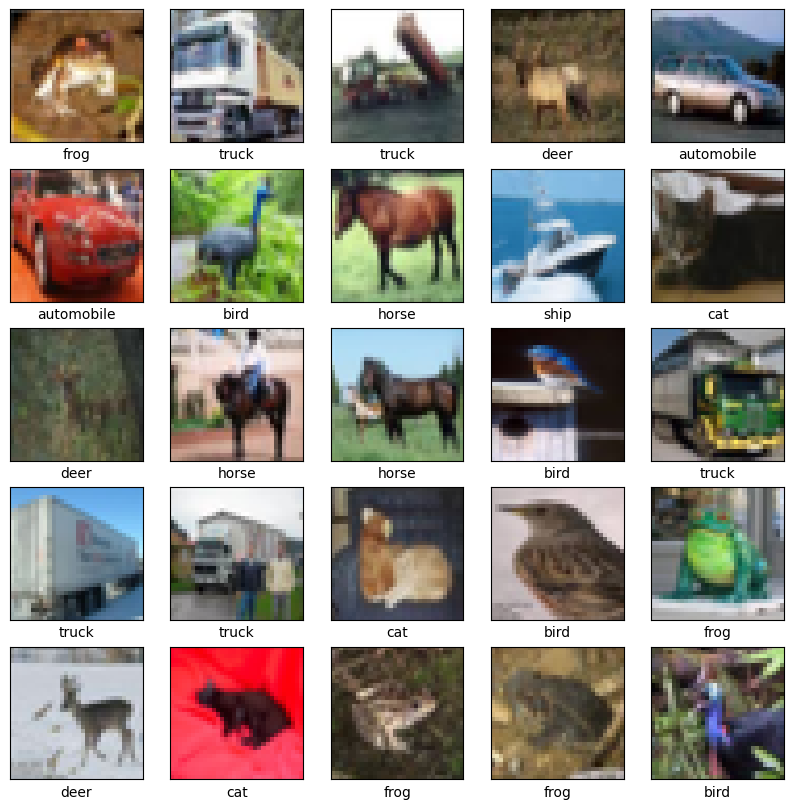

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### **Langkah 4 - Buat Model CNN**

**Langkah 4.1. - Buat Layer Konvolusi**

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

**Langkah 4.5. - Compile Model CNN**

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Langkah 5 - Fit Model**

In [24]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5533 - accuracy: 0.4338 - val_loss: 1.2366 - val_accuracy: 0.5562
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1777 - accuracy: 0.5799 - val_loss: 1.1011 - val_accuracy: 0.6046
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0420 - accuracy: 0.6333 - val_loss: 1.0114 - val_accuracy: 0.6453
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9527 - accuracy: 0.6642 - val_loss: 0.9571 - val_accuracy: 0.6663
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8879 - accuracy: 0.6883 - val_loss: 0.9796 - val_accuracy: 0.6562
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8322 - accuracy: 0.7068 - val_loss: 0.9141 - val_accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7862 - accuracy: 0.7251 - val_loss: 0.8706 - val_accura

#### **Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8560 - accuracy: 0.7043 - 710ms/epoch - 2ms/step


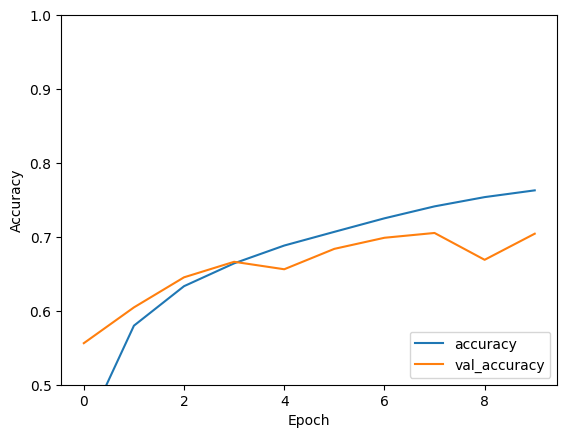

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

#### **Langkah 7 - Cetak Hasil Akurasi**

In [26]:
print(test_acc)

0.7042999863624573


### **Tugas**
- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
- Buatlah model CNN untuk klasifikasi dataset MNIST.

Epoch 1/25
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5779 - accuracy: 0.4150 - val_loss: 1.2513 - val_accuracy: 0.5450
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1921 - accuracy: 0.5753 - val_loss: 1.0517 - val_accuracy: 0.6323
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0367 - accuracy: 0.6373 - val_loss: 0.9972 - val_accuracy: 0.6473
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9341 - accuracy: 0.6727 - val_loss: 0.9131 - val_accuracy: 0.6818
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8570 - accuracy: 0.7013 - val_loss: 0.8911 - val_accuracy: 0.6868
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8011 - accuracy: 0.7213 - val_loss: 0.9433 - val_accuracy: 0.6749
Epoch 7/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7487 - accuracy: 0.7371 - val_loss: 0.8626 - val_accurac

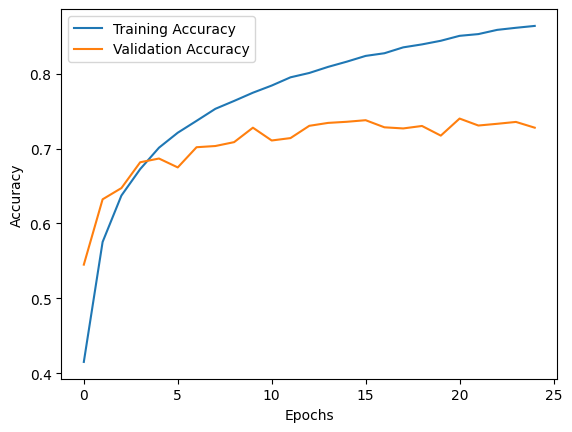

In [27]:
# Memodifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Memuat dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Melakukan normalisasi nilai pixel menjadi antara 1 dan 0
train_images, test_images = train_images / 255.0, test_images / 255.0

# Menentukan model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Mengompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(test_images, test_labels))

# Menampilkan nilai akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# Membuat model CNN untuk klasifikasi dataset MNIST

import tensorflow as tf

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Melakukan normalisasi nilai piksel menjadi antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Melakukan reshape data agar sesuai dengan model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Menentukan model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1296 - accuracy: 0.9608 - val_loss: 0.0709 - val_accuracy: 0.9772
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0349 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0262 - val_accuracy: 0.9915
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0335 - val_accuracy: 0.9889
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.0388 - val_accuracy: 0.9878
